# importing Libary

In [3]:
import os
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense ,Conv2D,MaxPooling2D,Dropout,Flatten,BatchNormalization
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [4]:
print("Hello")

Hello


# Path Data File

In [3]:
os.getcwd()

'E:\\EDGE MATRIX Program\\CNN_FACE\\Mask Detection'

In [7]:
path = 'E:\\EDGE MATRIX Program\\CNN_FACE\\Mask Detection\\data'

In [8]:
data_with_mask=os.listdir(path + '\\with_mask')
data_without_mask=os.listdir(path + '\\without_mask')
print(f"The size of the images inside the file data_with_mask {len(data_with_mask)}  ")
print(f"The size of the images inside the file data_without_mask {len(data_without_mask)}  ")
print()
print(data_with_mask[0:5])
print(data_without_mask[0:5])

The size of the images inside the file data_with_mask 3725  
The size of the images inside the file data_without_mask 3828  

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']


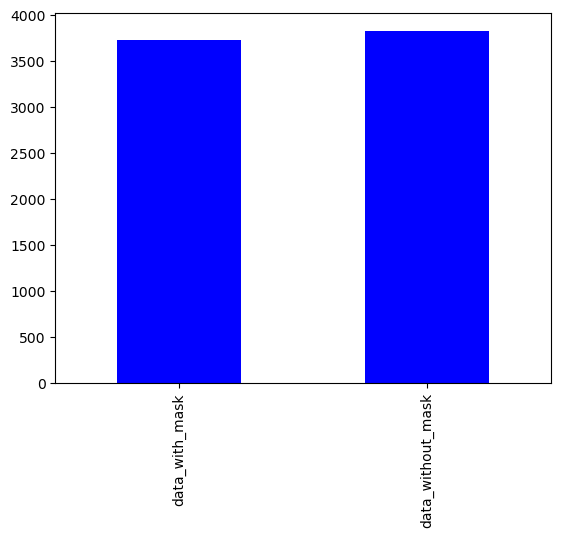

In [9]:
def visualization(mask,without,color):
  pd.Series({'data_with_mask':(mask),'data_without_mask':(without)}).plot(kind='bar',color=color)
  plt.show()
visualization(len(data_with_mask),len(data_without_mask),'blue')

# Create the labels


In [10]:
label_with_mask=[1]*len(data_with_mask)# the creat the label data with mask
label_without_mask=[0]*len(data_without_mask)# the creat the label data without mask

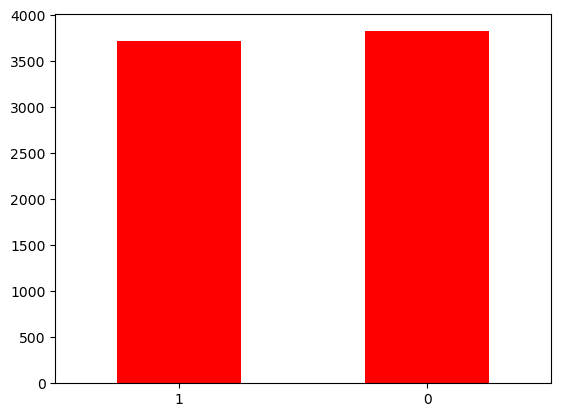

In [11]:
pd.Series({'1':len(label_with_mask),'0':len(label_without_mask)}).plot(kind='bar',color='red')
plt.xticks(rotation=1)
plt.show()

In [12]:
merge_labels=label_with_mask+label_without_mask

In [13]:
print(len(merge_labels))

7553


In [11]:
# merge_labels

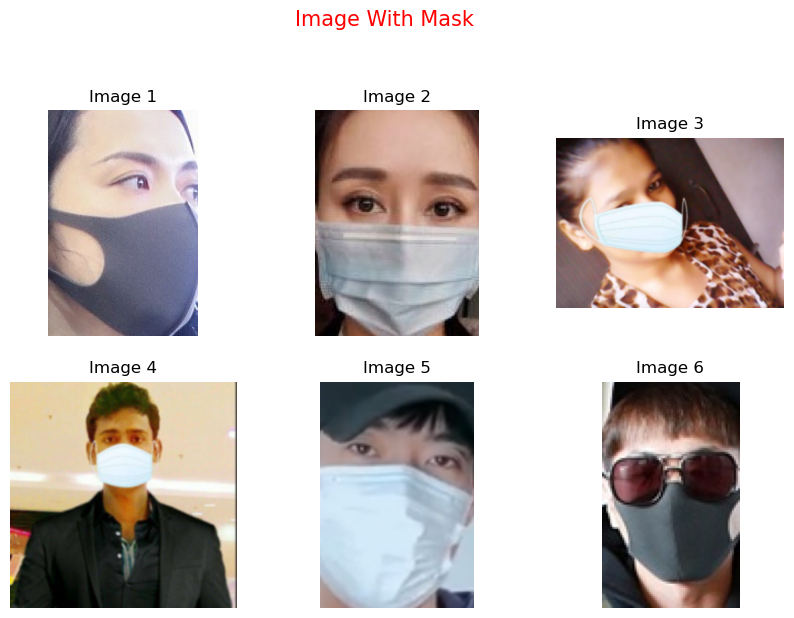

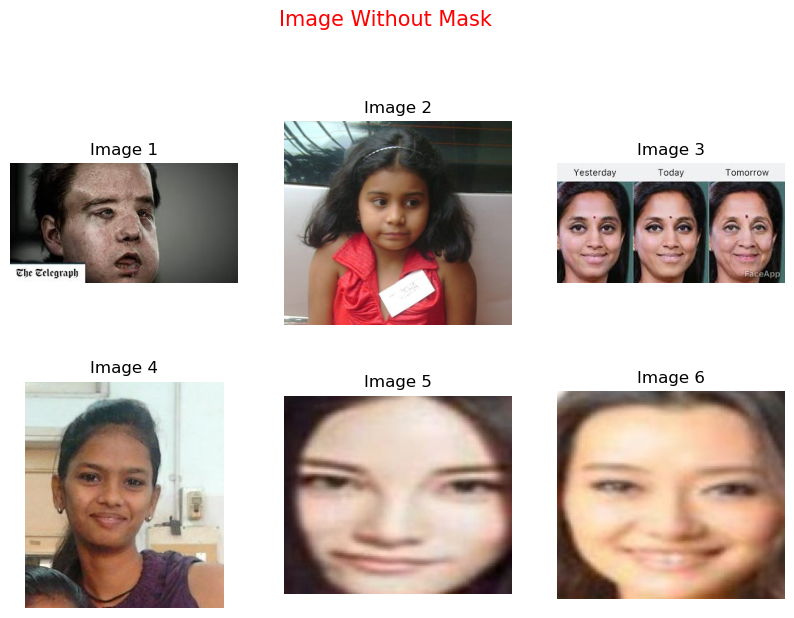

In [14]:
import random
def display_random_images(folder,num_sample,title):
  images=os.listdir(folder)
  images_sample=random.sample(images,num_sample)
  plt.figure(figsize=(10,10))
  for i , image in enumerate(images_sample):
    plt.subplot(3,3,i+1)
    image_path=os.path.join(folder,image)
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(f"Image {i+1}")
    plt.suptitle(f'{title}',color='red',size=15)
    plt.axis('off')
  plt.show()
display_random_images(path + '/with_mask',6,'Image With Mask')
display_random_images( path + '/without_mask',6,'Image Without Mask')

In [16]:
def image_preprocessing(folder):
  images=os.listdir(folder)
  data=[]
  for img in images:
    image=os.path.join(folder,img)
    image=cv2.imread(image)
    image=cv2.resize(image,(128,128))# image Rgb Contains 3 Channels
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    image=np.array(image)
    data.append(image)
  return data
data_with_mask=image_preprocessing(path + '/with_mask')
data_without_mask=image_preprocessing(path + '/without_mask')

In [17]:
print(f"The length of image after image preprocessing mask image {len(data_with_mask)} ".title())
print(f"The length of image after image preprocessing not mask image {len(data_without_mask)} ".title())

The Length Of Image After Image Preprocessing Mask Image 3725 
The Length Of Image After Image Preprocessing Not Mask Image 3828 


In [18]:
data_with_mask[0].shape

(128, 128, 3)

# Merge all data

In [25]:
all_data=data_with_mask+data_without_mask

In [26]:
def scaling_data (data):
  return data/255

**train_test_split**

In [27]:
X=np.array(all_data)
y=np.array(merge_labels)

In [28]:
X[0].shape

(128, 128, 3)

In [29]:
X[0]

array([[[51, 59, 32],
        [46, 56, 34],
        [55, 57, 41],
        ...,
        [18, 23, 17],
        [36, 40, 25],
        [34, 40, 17]],

       [[46, 53, 29],
        [49, 59, 37],
        [59, 62, 39],
        ...,
        [18, 20, 11],
        [53, 59, 47],
        [37, 46, 28]],

       [[52, 59, 37],
        [49, 58, 36],
        [61, 65, 39],
        ...,
        [34, 32, 18],
        [16, 21, 15],
        [24, 34, 21]],

       ...,

       [[62, 73, 38],
        [66, 76, 41],
        [74, 85, 50],
        ...,
        [ 8,  7,  2],
        [27, 26, 21],
        [13, 13,  8]],

       [[60, 73, 35],
        [59, 70, 39],
        [68, 76, 50],
        ...,
        [16, 15, 11],
        [16, 14, 11],
        [14,  9,  7]],

       [[53, 69, 30],
        [52, 63, 36],
        [57, 63, 43],
        ...,
        [18, 17, 15],
        [15, 11, 10],
        [21, 12, 13]]], dtype=uint8)

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=44,shuffle=True,stratify=y)

In [31]:
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [32]:
X_train_scaled[0].shape

(128, 128, 3)

In [33]:
X_train_scaled[0]

array([[[0.45490196, 0.43137255, 0.43137255],
        [0.47058824, 0.44705882, 0.44313725],
        [0.49411765, 0.47058824, 0.45882353],
        ...,
        [0.1254902 , 0.11372549, 0.12941176],
        [0.12156863, 0.11372549, 0.12941176],
        [0.12156863, 0.11372549, 0.13333333]],

       [[0.48235294, 0.45098039, 0.45098039],
        [0.49803922, 0.46666667, 0.4627451 ],
        [0.51764706, 0.49019608, 0.47843137],
        ...,
        [0.12941176, 0.11764706, 0.12941176],
        [0.1254902 , 0.11764706, 0.13333333],
        [0.1254902 , 0.11764706, 0.13333333]],

       [[0.49803922, 0.45882353, 0.4627451 ],
        [0.51372549, 0.47843137, 0.4745098 ],
        [0.5372549 , 0.50196078, 0.49411765],
        ...,
        [0.12941176, 0.12156863, 0.12941176],
        [0.13333333, 0.1254902 , 0.13333333],
        [0.13333333, 0.1254902 , 0.13333333]],

       ...,

       [[0.22352941, 0.03921569, 0.07843137],
        [0.21960784, 0.03921569, 0.0745098 ],
        [0.21568627, 0

In [34]:
def display_images(images,title):
  plt.figure(figsize=(10,10))
  for i, image in enumerate(images):
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.suptitle(title,color='red',size=15)
  plt.show()

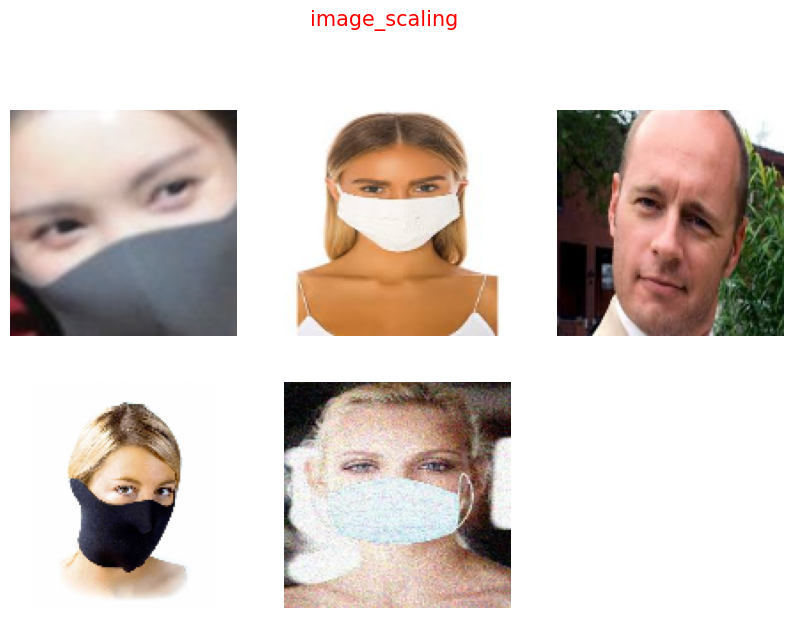

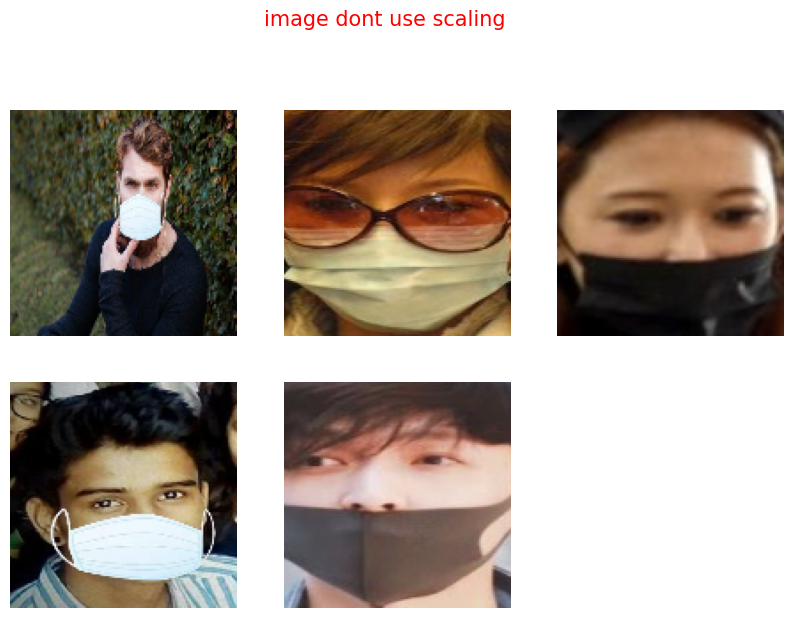

In [35]:
display_images(X_train_scaled[:5],'image_scaling')
display_images(X[:5],'image dont use scaling')


**Building a Convolutional Neural Networks (CNN)**

In [36]:
model = keras.Sequential()
# odel = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(2, activation='sigmoid'))

E:\Ana\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,722,562 (14.20 MB)

 Trainable params: 3,722,562 (14.20 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [39]:
# training the neural network
history = model.fit(X_train_scaled, y_train, validation_split=0.15, epochs=20)

Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 85s 378ms/step - accuracy: 0.6227 - loss: 0.6956 - val_accuracy: 0.8764 - val_loss: 0.2953
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 42s 243ms/step - accuracy: 0.8641 - loss: 0.3065 - val_accuracy: 0.8879 - val_loss: 0.2812
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 252ms/step - accuracy: 0.8852 - loss: 0.2686 - val_accuracy: 0.9148 - val_loss: 0.2226
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 56s 329ms/step - accuracy: 0.9116 - loss: 0.2237 - val_accuracy: 0.9221 - val_loss: 0.2016
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 46s 269ms/step - accuracy: 0.9242 - loss: 0.1902 - val_accuracy: 0.9180 - val_loss: 0.2479
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 248ms/step - accuracy: 0.9280 - loss: 0.1699 - val_accuracy: 0.9315 - val_loss: 0.2179
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 43s 253ms/step - accuracy: 0.9276 - loss: 0.1579 - val_accuracy: 0.9283 - val_loss: 0.2117
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 75s 440ms/step - accuracy: 0.9450 - loss: 0

In [40]:
model.save('mask_detection_model.keras')

In [41]:
loss,accuracy=model.evaluate(X_test_scaled,y_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9399 - loss: 0.2487


In [42]:
print(f'loss data test : {loss}')
print(f'accuracy data test : {accuracy}')

loss data test : 0.22877778112888336
accuracy data test : 0.9408649802207947


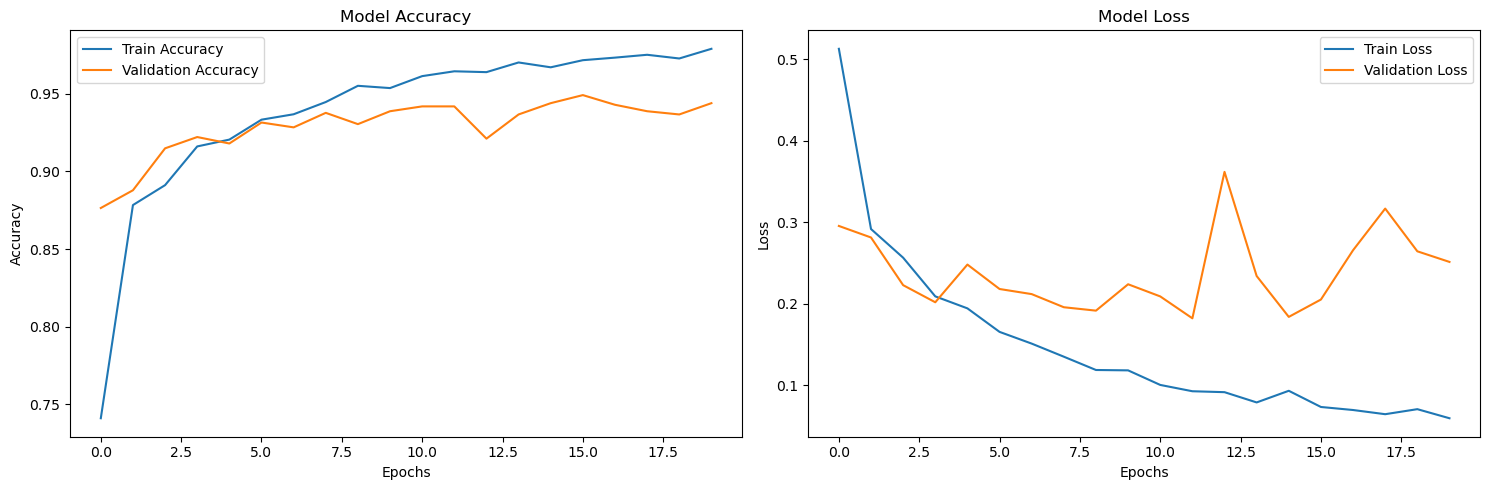

In [43]:
plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [29]:
from tensorflow.keras.models import load_model
model = load_model('mask_detection_model.keras')

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,167,688 (42.60 MB)

 Trainable params: 3,722,562 (14.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,445,126 (28.40 MB)

In [52]:
import cv2
def deployment(path_file):
  image=cv2.imread(path_file)
  image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
  image=cv2.resize(image,(128,128))
  image=np.array(image)
  image=image/255
  image_rshape=np.reshape(image,[1,128,128,3])
  prediction=model.predict(image_rshape)
  image_label=np.argmax(prediction)
  if image_label==1:
    print("With mask")
  else:
    print("Without mask")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
With mask


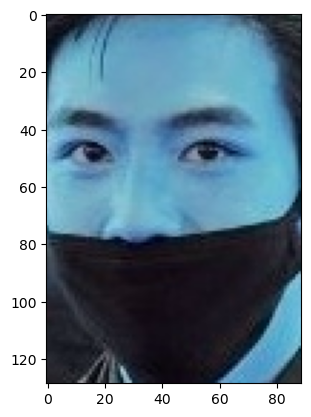

In [53]:
path_file = path + '//p3.jpg'
image = cv2.imread(path_file)
plt.imshow(image)
deployment(path_file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Without mask


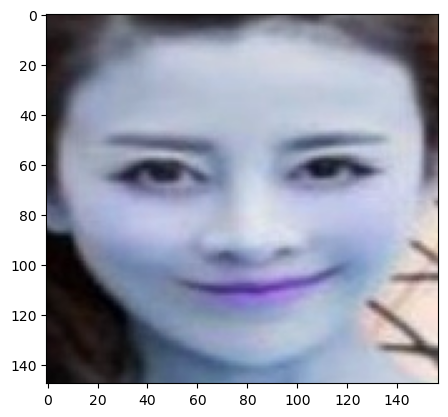

In [60]:
path_file = path + '//p1.jpg'
image = cv2.imread(path_file)
plt.imshow(image)
deployment(path_file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
With mask


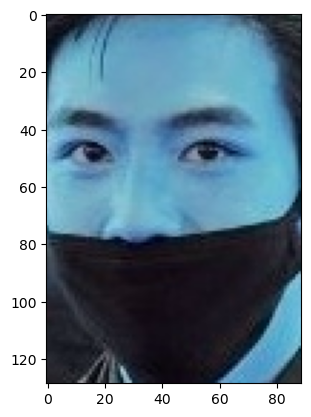

In [59]:
path_file = path + '//p3.jpg'
image = cv2.imread(path_file)
plt.imshow(image)
deployment(path_file)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
With mask


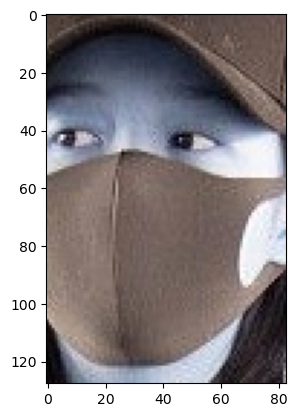

In [56]:
path_file = path + '//p4.jpg'
image = cv2.imread(path_file)
plt.imshow(image)
deployment(path_file)

In [32]:
y_predict=model.predict(X_test_scaled)

36/36 [==============================] - 0s 8ms/step


In [36]:
y_labels=[np.argmax(i) for i in y_predict ]
print(f"The label prediction {y_labels[0:5]}")

The label prediction [1, 0, 1, 0, 1]


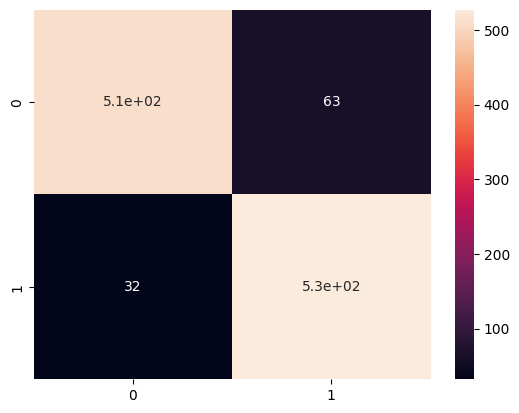

In [46]:
confusionmatrix=confusion_matrix(y_test,y_labels)
sns.heatmap(confusionmatrix,annot=True)
plt.show()

In [47]:
print(classification_report(y_labels,y_test))

              precision    recall  f1-score   support



           0       0.89      0.94      0.91       543

           1       0.94      0.89      0.92       590



    accuracy                           0.92      1133

   macro avg       0.92      0.92      0.92      1133

weighted avg       0.92      0.92      0.92      1133


